<br>
<center> <h2>Maestría en Inteligencia Analítica para la Toma de Decisiones</h2> </center>
<center> <h3>Modelos avanzados para análisis de datos 1</h3> </center>
<br>
<h3>Exercise 13</h3>
<h3>Analyze class homeworks</h3>
 

##### Presentado por:
    Lupe Pinzon Wagner                (200813063)
    Diego Andres Ojeda Vargas         (201924250)
    Héctor Fabián Rodríguez Mayorga   (201921382)
    Iván josé Galindo Gaviria         (201924193)

 

<h4> Julio 2020</h4>
<br>

In [634]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_excel('Consolidado_respuestas_escribir_v2.xlsx')
data.head()

,Genero,E1 - Examples of Time Series Analysis,E4 - Panel Data,E6 - Decison Trees,E8 - Ensemble Trees Overview,E10 - REST-API,E11 - Natural Language Processing Overview
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...


In [635]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
Genero                                        46 non-null object
E1 - Examples of Time Series Analysis         44 non-null object
E4 - Panel Data                               44 non-null object
E6 - Decison Trees                            42 non-null object
E8 - Ensemble Trees Overview                  38 non-null object
E10 - REST-API                                45 non-null object
E11 - Natural Language Processing Overview    16 non-null object
dtypes: object(7)
memory usage: 2.6+ KB


# Exercise 13.1

Analyze the writing patterns of each student

In [636]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('spanish')

from scipy.spatial.distance import cosine

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cambiamos los headers del dataframe para un manejo mas sencillo:

In [637]:
new_names={"E1 - Examples of Time Series Analysis" : "E1",
            "E4 - Panel Data" : "E4",
            "E6 - Decison Trees" : "E6",
            "E8 - Ensemble Trees Overview" : "E8",
            "E10 - REST-API" : "E10",
            "E11 - Natural Language Processing Overview" : "E11"
            } 

data = data.rename(columns=new_names)
data.head()

,Genero,E1,E4,E6,E8,E10,E11
0,M,One of the most valuable application of time s...,The main difference between panel data and tim...,Decision tree are a model used by the analytic...,They are used to make a better prediction than...,Es una forma de arquitectura de datos. Los mic...,NaN
1,F,ANÁLISIS DE SERIES DE TIEMPO – USOS \nEl análi...,Series de Tiempo vs Datos en Panel\nUna serie ...,TIPOS DE ÁRBOLES DE DECISIÓN Y APLICACIONES\nL...,ENSAMBLAJE EN MACHINE LEARNING\nLos métodos de...,Microservicios\nEl objetivo principal de la im...,NaN
2,M,Una serie de tiempo es una colección de datos ...,NaN,los arboles de decisión hacen parte de los alg...,Ensemble methods is a machine learning techniq...,El enfoque tradicional para el diseño de aplic...,"LexisNexis launched Lexis Analytics, a legal r..."
3,M,\nGiven that Time Series Analysis allows to un...,The difference between panel data and time ser...,Decision Trees Algorithms are machine function...,Ensemble methods in Tree Decision algorithms b...,Micro-services are defined as a type of softwa...,NaN
4,M,Time Series Analysis is concerned with the stu...,A time series is represented by a variable or ...,Decision trees are a popular supervised machin...,The ensemble method is a combination of severa...,A microservice is a type of information techno...,A commercial product which uses Natural Langua...


Unimos las tareas que escribió cada estudiantes:

In [638]:
estudiantes = []
T=""
for est in range(0,46):
    T=""
    for tarea in range(1,7):
        if pd.isnull(data.loc[est][tarea]):
            x=1
        else:
            T = T + data.loc[est][tarea]
    estudiantes.append(T)

estudiantes=pd.DataFrame(estudiantes)
estudiantes.columns=["Tareas"]

In [639]:
X=estudiantes.Tareas

In [640]:
for i in range(0,len(X)):
  X[i] = str(X[i]).replace("'","")
  X[i] = str(X[i]).replace(".","")
  X[i] = str(X[i]).replace("]","")
  X[i] = str(X[i]).replace("[","")
  X[i] = str(X[i]).replace(":","")
  X[i] = str(X[i]).replace("/","")
  X[i] = str(X[i]).replace("-","")
  X[i] = str(X[i]).replace("?","")
  X[i] = str(X[i]).replace("¿","")
  X[i] = str(X[i]).replace(",","")
  X[i] = str(X[i]).replace("(","")
  X[i] = str(X[i]).replace(")","")
  X[i] = str(X[i]).replace("<","")
  X[i] = str(X[i]).replace(">","")
  X[i] = str(X[i]).replace('\n', ' ').replace('\r', '')

In [641]:
X[0]

'One of the most valuable application of time series analysis is the financial one Due to the amount of information that is given by market in different time periods a stock price could give information by seconds minutes hours days On the other hand there are variables that give information in a weekly basis oil inventories a monthly basis PMI consumer index or in a yearly or quarterly basis economic growth sales income and other financial indicators from a company For that reason there are three great examples of time series analysis given forward on the financial field  As an example the financial time series ie stock prices rates sales could be predicted with an ARIMA model As they want to know patrons to predict the future The stock prices for example has a trend it is explained with the inflation rate the economic growth and the consumer consumption   Another application is the one that gave the financial market to moving averages as a great approximation to understand the price 

In [642]:
# use CountVectorizer to create document-term matrices from X
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)

In [643]:
# rows are documents, columns are terms (aka "tokens" or "features")
X_dtm.shape

(46, 7592)

In [644]:
# last 50 features
print(vect.get_feature_names()[-150:-100])

['vías', 'vídeo', 'vínculos', 'wait', 'wang', 'want', 'war', 'warming', 'was', 'waste', 'watersand', 'watson', 'way', 'ways', 'we', 'weak', 'weakly', 'weather', 'web', 'webservice', 'website', 'week', 'weekends', 'weekly', 'weeks', 'weight', 'weighted', 'weights', 'well', 'welldefined', 'wellhead', 'wells', 'went', 'were', 'what', 'wheater', 'when', 'where', 'whereas', 'whether', 'which', 'while', 'whit', 'whitaker', 'who', 'whole', 'wholesale', 'whose', 'why', 'widely']


In [645]:
 #Creamos un diccionario de palabras en ingles
 english_vocab = set(w.lower() for w in nltk.corpus.words.words())

Definimos la funcion que extrae raices dependiendo si la palabra esta en ingles o en español

In [646]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
import nltk

# Extractor de raices en español
from nltk.stem.snowball import SnowballStemmer
spanishStemmer=SnowballStemmer("spanish")

#Extractor de raices en ingles
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

# Busca en diccionario en ingles
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

def split_into_lemmas_both(text):
    text = text.lower()
    words = text.split()
    for word in words:
        if word in english_vocab:
            return [wordnet_lemmatizer.lemmatize(word) for word in words]
        else:
            return [spanishStemmer.stem(word) for word in words]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Definimos la lista de stop words que usaremos:

In [647]:
nltk.download('stopwords')

final_stopwords_list = stopwords.words('english') + stopwords.words('spanish')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Aplicamos la funcion vectorizadora, usando:
* Stop words en español y en ingles.
* n-gramas entre 1 y 2 palabras.
* extractor de raices en ingles y español, segun corresponda.
* Solo se escogeran maximo 500 parabras (las de mayor frecuencia)

In [648]:
vect = TfidfVectorizer(stop_words=final_stopwords_list,ngram_range=(1, 2),analyzer=split_into_lemmas_both,binary=True,max_features=500)
X_dtm = vect.fit_transform(X)
X_dtm.shape

(46, 500)

In [649]:
Tabla_Frecuencias_Est=pd.DataFrame(X_dtm.toarray(), columns=vect.get_feature_names())
Tabla_Frecuencias_Est.head()

,1,2,3,4,a,además,adicional,afectar,al,algorithm,...,when,which,with,y,ya,yo,árbol,árboles,único,•
0,0.000000,0.000000,0.000000,0.0,0.043064,0.0,0.000000,0.000000,0.051099,0.105604,...,0.095219,0.098410,0.089469,0.047908,0.062398,0.0,0.0,0.0,0.0,0.000000
1,0.053617,0.051180,0.054901,0.0,0.035322,0.0,0.086618,0.000000,0.041912,0.000000,...,0.000000,0.000000,0.000000,0.039295,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.054602,0.052121,0.055911,0.0,0.035971,0.0,0.000000,0.088211,0.000000,0.088211,...,0.079536,0.082202,0.074733,0.040017,0.000000,0.0,0.0,0.0,0.0,0.082202
3,0.000000,0.000000,0.000000,0.0,0.051813,0.0,0.000000,0.000000,0.000000,0.127058,...,0.114563,0.118403,0.107644,0.000000,0.000000,0.0,0.0,0.0,0.0,0.118403
4,0.000000,0.070049,0.000000,0.0,0.048345,0.0,0.000000,0.000000,0.057365,0.118553,...,0.106894,0.110477,0.100439,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


Funcion que devuelve el top-20 de las parabras de un alumno

In [650]:
def top_10(id_alumno):
    # choose a random text
    review_id = id_alumno
    review_text = X[review_id]
    review_length = len(review_text)

    # create a dictionary of words and their TF-IDF scores
    features = vect.get_feature_names()
    word_scores = {}
    for word in vect.vocabulary_.keys():
        word = word.lower()
        if word in features:
            word_scores[word] = X_dtm[review_id, features.index(word)]

    # print words with the top 10 TF-IDF scores
    #print('TOP SCORING WORDS:')
    Top_Words = ""
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:20]
    for word, score in top_scores:
        Top_Words=Top_Words+" "+word

    return Top_Words

Crearemos un dataframe con el Top-20 de palabras de cada alumno:

In [651]:
Top_Words_by_Est = []

for est in range(0,46):
    Top_Words_by_Est.append(top_10(est))

In [652]:
Top_Words_by_Est

[' us important hacen index more have algorithm prediction tradicional ellas one there from example they we system business ensemble capacidad',
 ' futur promedi individu funcional produccion index ellas identific obten podr larg may busc objet defin proces supervis regresion ventaj numer',
 ' hacen algorithm prediction tradicional may independent particular podría lugar usados crear c45 precisión implementar afectar equipos falla one there from',
 ' important more have algorithm prediction may independent one there from example we system business ensemble bootstrap interface by if each',
 ' us important how more have algorithm prediction may independent c45 one there from example they we system business ensemble much',
 ' us important how have algorithm usados crear importante peso problema lenguajes one there example they system debido interval funciones clase',
 ' utilizan tradicional original importante peso entender muestra muestras utilizar casos debido pib utilizados funciones b

## Conclusiones

Al analizar el top-20 de las palabras de cada tarea, podemos evidenciar lo siguiente:
* Hay mas estudiantes que escriben en español que en ingles.
* Hay estudiantes (pocos) que escribieron algunas tareas en ingles y otras en español.
* Una de las palabras mas usadas por los estudiantes es: futuro, muy problemente esta asociado al concepto de que machine learning es el futuro.
* Otra palabra frecuentemente utilizada "Prececir", de lo que se podria intuir que la mayoria estan mas interesados en modelos de aprendizaje supervisado.

# Exercise 13.2

Evaluate the similarities of the homeworks of the students.

At a homework level, then as a student level.


Definimos la funcion que va a calcular la similaridad coseno entre todos los textos de todos los alumnos:

In [653]:
def cosine_distance_countVectorizer(s1, s2):
    vect = TfidfVectorizer(stop_words=final_stopwords_list,ngram_range=(1, 2),analyzer=split_into_lemmas_both,max_features=500)
    X_dtm = vect.fit_transform([s1, s2]).todense()
    return 1-cosine(X_dtm[0], X_dtm[1])

Creamos un dataframe con los calculos de similaridades de los textos de todos los alumnos comparados con todos:

In [654]:
jacc = []
indice_i = []
indice_j = []
for i in range(0,46):
    for j in range(i,46):
        if i!=j:
            jacc.append(cosine_distance_countVectorizer(Top_Words_by_Est[i], Top_Words_by_Est[j]))
            indice_i.append(i)
            indice_j.append(j)

Tabla_Similaridades_Est = pd.DataFrame({'Alumno i':indice_i, 'Alumno j':indice_j,"Similaridad":jacc}).sort_values('Similaridad',ascending=False)
Tabla_Similaridades_Est.index = np.arange(1, len(Tabla_Similaridades_Est) + 1)
Tabla_Similaridades_Est.head(10)

,Alumno i,Alumno j,Similaridad
1,4,38,0.741516
2,34,44,0.669419
3,27,38,0.669419
4,3,38,0.669419
5,16,34,0.602975
6,3,4,0.602975
7,0,38,0.602975
8,0,4,0.602975
9,16,39,0.541544
10,1,16,0.541544


Revisamos las palabras TOP-20 de dos alumnos con similaridades bajas, y se puede evideciar que usan parabras muy diferentes en sus tareas, probablemente tienen diferentes profesiones, trabajan en áreas muy diferentes o consultaron fuentes diferentes:

In [655]:
print(top_10(0))
print(top_10(1))

 us important hacen index more have algorithm prediction tradicional ellas one there from example they we system business ensemble capacidad
 futur promedi individu funcional produccion index ellas identific obten podr larg may busc objet defin proces supervis regresion ventaj numer


Revisamos las palabras TOP-20 de dos alumnos con similaridades altas, y podriamos observar que usan frecuentemente las mismas palabras (entre ellos), se podria concluir que consultaron fuentes muy similares para sus tareas:

In [656]:
print(top_10(4))
print(top_10(38))

 us important how more have algorithm prediction may independent c45 one there from example they we system business ensemble much
 us important index more have algorithm prediction may independent one there from example they we business ensemble much bootstrap by


Unimos las los textos de todos los estudiantes por cada tarea:

In [657]:
tareas = []
E=""
for tarea in range(1,7):
    E=""
    for est in range(0,46):
        if pd.isnull(data.loc[est][tarea]):
            x=1
        else:
            E = E + data.loc[est][tarea]
    tareas.append(E)

tareas=pd.DataFrame(tareas).head(10)
tareas.columns=["Estudiantes"]
tareas

,Estudiantes
0,One of the most valuable application of time s...
1,The main difference between panel data and tim...
2,Decision tree are a model used by the analytic...
3,They are used to make a better prediction than...
4,Es una forma de arquitectura de datos. Los mic...
5,"LexisNexis launched Lexis Analytics, a legal r..."


In [658]:
X=tareas.Estudiantes

Aplicamos la funcion vectorizadora, usando:
* Stop words en español y en ingles.
* n-gramas entre 1 y 2 palabras.
* extractor de raices en ingles y español, segun corresponda.
* Solo se escogeran maximo 500 parabras (las de mayor frecuencia)

In [659]:
vect = TfidfVectorizer(stop_words=final_stopwords_list,ngram_range=(1, 2),analyzer=split_into_lemmas_both,binary=True,max_features=500)
X_dtm = vect.fit_transform(X)
X_dtm.shape

(6, 500)

In [660]:
Tabla_Frecuencias=pd.DataFrame(X_dtm.toarray(), columns=vect.get_feature_names())
Tabla_Frecuencias

,&,-,.,1),1.,2),2.,3),3.,a,...,where,which,with,without,y,"y,",ya,–,•,
0,0.039146,0.045181,0.045181,0.045181,0.039146,0.045181,0.039146,0.045181,0.039146,0.039146,...,0.045181,0.039146,0.039146,0.000000,0.039146,0.045181,0.039146,0.045181,0.039146,0.052318
1,0.042727,0.049314,0.049314,0.049314,0.042727,0.049314,0.042727,0.049314,0.042727,0.042727,...,0.049314,0.042727,0.042727,0.049314,0.042727,0.049314,0.042727,0.049314,0.042727,0.000000
2,0.039266,0.045318,0.045318,0.045318,0.039266,0.045318,0.039266,0.045318,0.039266,0.039266,...,0.045318,0.039266,0.039266,0.045318,0.039266,0.045318,0.039266,0.045318,0.039266,0.052477
3,0.038802,0.044783,0.044783,0.044783,0.038802,0.044783,0.038802,0.044783,0.038802,0.038802,...,0.044783,0.038802,0.038802,0.044783,0.038802,0.044783,0.038802,0.044783,0.038802,0.051858
4,0.039293,0.045350,0.045350,0.045350,0.039293,0.045350,0.039293,0.045350,0.039293,0.039293,...,0.045350,0.039293,0.039293,0.045350,0.039293,0.045350,0.039293,0.045350,0.039293,0.052514
5,0.073232,0.000000,0.000000,0.000000,0.073232,0.000000,0.073232,0.000000,0.073232,0.073232,...,0.000000,0.073232,0.073232,0.084521,0.073232,0.000000,0.073232,0.000000,0.073232,0.000000


Crearemos un dataframe con el top-20 de palabras por tarea:

In [661]:
Top_Words_by_Tar = []

for est in range(0,6):
    Top_Words_by_Tar.append(top_10(est))

In [662]:
Top_Words_by_Tar

[' time analysis, due amount could part model tiempo distribución crecimiento teniendo quiere fenómeno presenta identificar presentar encontrar bajo parámetros bastante',
 ' time analysis, due amount could part tiempo crecimiento quiere fenómeno presenta identificar presentar encontrar parámetros partir estimación consumo take point',
 ' analysis, due amount model distribución crecimiento teniendo quiere fenómeno identificar presentar encontrar bajo bastante partir estimación tendencia consumo control even',
 ' time amount could model tiempo distribución teniendo fenómeno presenta identificar presentar encontrar bajo parámetros bastante partir estimación tendencia even every',
 ' time due could part tiempo distribución crecimiento teniendo quiere presenta bajo parámetros bastante tendencia consumo control every their take related',
 ' analysis, part model control even every result identify been tradicional develop them. algorithm present adicionalmente, crucial focus par unos error']

Evaluaremos la similaridad de las tareas calculando la distancia coseno entre el top-20 de las parabras de cada tarea:

In [663]:
jacc = []
indice_i = []
indice_j = []
for i in range(0,6):
    for j in range(i,6):
        if i!=j:
            jacc.append(cosine_distance_countVectorizer(Top_Words_by_Tar[i], Top_Words_by_Tar[j]))
            indice_i.append(i)
            indice_j.append(j)

Tabla_Similaridades_Tar = pd.DataFrame({'Tarea i':indice_i, 'Tarea j':indice_j,"Similaridad":jacc}).sort_values('Similaridad',ascending=False)
Tabla_Similaridades_Tar.index = np.arange(1, len(Tabla_Similaridades_Tar) + 1)
Tabla_Similaridades_Tar

,Tarea i,Tarea j,Similaridad
1,0,1,0.602975
2,0,3,0.602975
3,0,4,0.484581
4,1,3,0.431613
5,1,4,0.382237
6,3,4,0.382237
7,2,5,0.178281
8,0,2,0.144384
9,1,2,0.112343
10,0,5,0.082011


Evaluaremos el top-20 de las palabras de las tareas que tienen baja similaridad y las que tienen alta simildaridad:

In [664]:
print(Top_Words_by_Tar[0])
print(Top_Words_by_Tar[1])

 time analysis, due amount could part model tiempo distribución crecimiento teniendo quiere fenómeno presenta identificar presentar encontrar bajo parámetros bastante
 time analysis, due amount could part tiempo crecimiento quiere fenómeno presenta identificar presentar encontrar parámetros partir estimación consumo take point


In [665]:
print(Top_Words_by_Tar[1])
print(Top_Words_by_Tar[5])

 time analysis, due amount could part tiempo crecimiento quiere fenómeno presenta identificar presentar encontrar parámetros partir estimación consumo take point
 analysis, part model control even every result identify been tradicional develop them. algorithm present adicionalmente, crucial focus par unos error


## Conclusiones

Al analizar el top-20 de las palabras de cada tarea, podemos evidenciar lo siguiente:
* Las tareas mas similares son las tareas 1 y 2, tiene sentido, ya que eran tareas sobre el mismo tema: Series de Tiempo.
* Las tareas menos similares son las tareas 2 y 6, que corresponden a temas demasiado dispares.

# Exercise 13.3

Create a classifier to predict the gender of each student



In [666]:
y = data.Genero
X = estudiantes.Tareas

In [667]:
# use Random Forest Classifier to predict the star rating
vect = TfidfVectorizer(stop_words=final_stopwords_list,ngram_range=(1, 3),analyzer=split_into_lemmas_both,max_features=10000)
dtm = vect.fit_transform(X)
rfc = RandomForestClassifier()
print(pd.Series(cross_val_score(rfc, dtm, y, cv=10)).describe());

count    10.000000
mean      0.780000
std       0.097753
min       0.600000
25%       0.750000
50%       0.775000
75%       0.800000
max       1.000000
dtype: float64


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

## Conclusiones

* La utilizacion de n-gramas y el uso de stopwords al generar el modelo, mejora notablemente su capacidad predictiva.

# Exercise 13.4

Classify group members into differente subgroups (minimum 3) according to a characteristic of your choice.

In [668]:
Tabla_Frecuencias_Est.head()

,1,2,3,4,a,además,adicional,afectar,al,algorithm,...,when,which,with,y,ya,yo,árbol,árboles,único,•
0,0.000000,0.000000,0.000000,0.0,0.043064,0.0,0.000000,0.000000,0.051099,0.105604,...,0.095219,0.098410,0.089469,0.047908,0.062398,0.0,0.0,0.0,0.0,0.000000
1,0.053617,0.051180,0.054901,0.0,0.035322,0.0,0.086618,0.000000,0.041912,0.000000,...,0.000000,0.000000,0.000000,0.039295,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.054602,0.052121,0.055911,0.0,0.035971,0.0,0.000000,0.088211,0.000000,0.088211,...,0.079536,0.082202,0.074733,0.040017,0.000000,0.0,0.0,0.0,0.0,0.082202
3,0.000000,0.000000,0.000000,0.0,0.051813,0.0,0.000000,0.000000,0.000000,0.127058,...,0.114563,0.118403,0.107644,0.000000,0.000000,0.0,0.0,0.0,0.0,0.118403
4,0.000000,0.070049,0.000000,0.0,0.048345,0.0,0.000000,0.000000,0.057365,0.118553,...,0.106894,0.110477,0.100439,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


Realizaremos un clustering jerarquico usando la tabla de frecuencias de las 500 palabras mas frecuentes usadas en las tareas de cada alumno y visualizaremos a través de un dendograma los tres grupos que se generan a una profunidad dada (linea punteada):

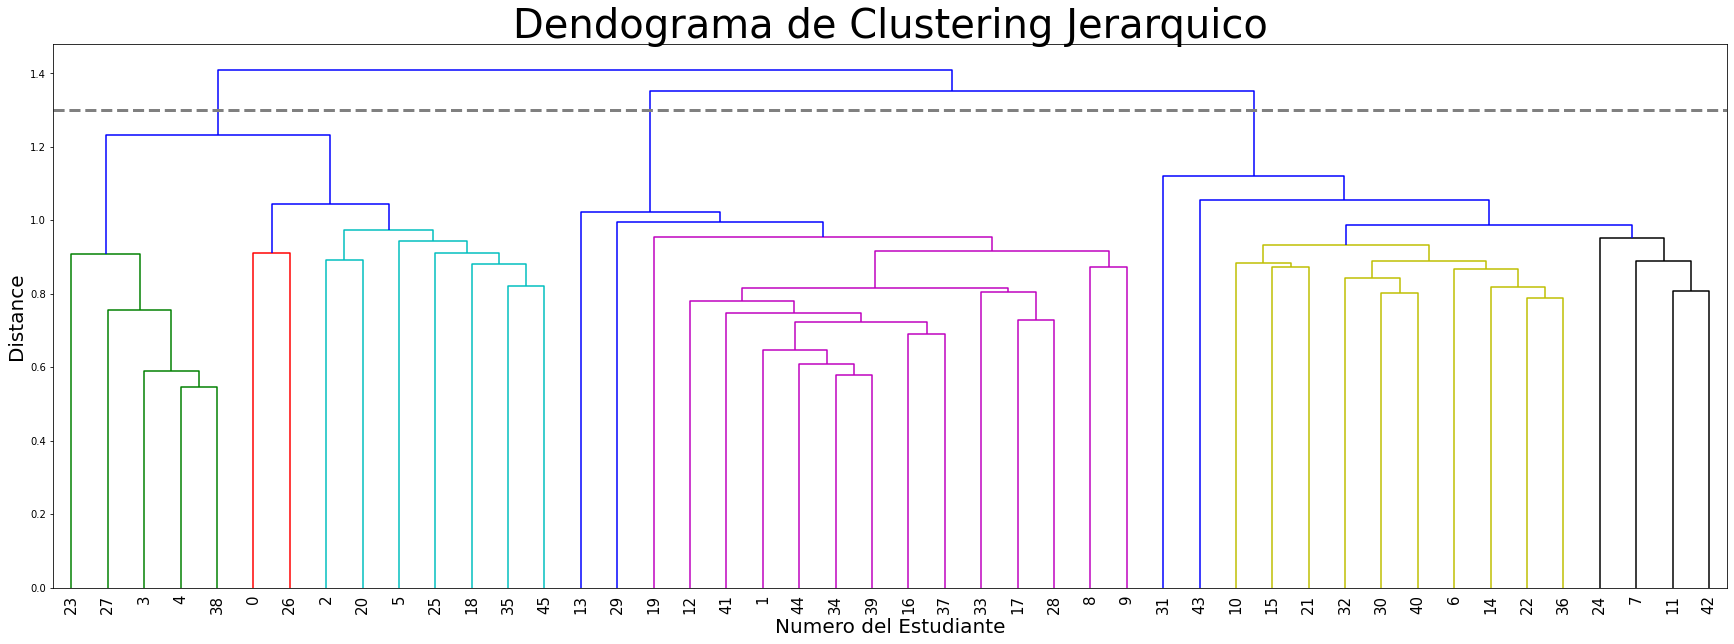

In [677]:
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(Tabla_Frecuencias_Est, method='complete')



plt.figure(figsize=(30, 10))
dendrogram(mergings,
           truncate_mode='lastp',
           leaf_rotation=90,
           leaf_font_size=15,
           #annotate_above=10,
           #max_d=1.3,
           p=46
           )
plt.axhline(y=1.3, c='grey', lw=3, linestyle='dashed')
plt.title('Dendograma de Clustering Jerarquico',size=40)
plt.xlabel("Numero del Estudiante",size=20)
plt.ylabel('Distance',size=20)
plt.show()

Asignaremos el numero de cluster (3 grupos) a cada alumno segun la jeraquizacion usada:

In [674]:
from scipy.cluster.hierarchy import fcluster
k=3
clusters = fcluster(mergings, k, criterion='maxclust')

In [682]:
Grupos_Alumnos=pd.concat([pd.DataFrame(clusters),pd.DataFrame(Top_Words_by_Est)],axis=1)
Grupos_Alumnos.columns = ['Grupo','Top 20 Palabras']
Grupos_Alumnos.loc[Grupos_Alumnos.Grupo==2]

,Grupo,Top 20 Palabras
1,2,futur promedi individu funcional produccion i...
8,2,individu prim predec aument grand identific p...
9,2,promedi funcional produccion orden aument lar...
12,2,individu aument grand ellas identific obten l...
13,2,futur produccion prim predec aument identific...
16,2,futur promedi individu funcional predec grand...
17,2,futur individu funcional prim predec aument o...
19,2,us important produccion how orden grand index...
28,2,promedi individu funcional orden prim predec ...
29,2,futur produccion orden grand obten larg objet...


## Conclusiones

* Podemos evidenciar que el grupo #1 escribió la mayoria de sus articulos en ingles y busca resaltar en sus tareas la importancia de los temas de la misma en cada industria (frecuencia de la palabra "important").
* Observando las caracteristicas de escritura del grupo #2, podemos ver que escribieron articulos tanto en ingles como en español y hacen referencia principalmente a que los temas tratados en las tareas son el futuro en cada una de sus industrias (frecuencia de la parabra "futur").
* Al analizar el grupo #3, podemos ver que escribieron la mayoria de sus articulos en español y quiseron reflejar las aplicaciones relacionadas con los temas de las tareas en las areas propias (frecuencia de la palabra "utilizan").